# **Análisis exploratorio**

## **Importación de Librerías**

Se importan las librerías esenciales para facilitar el análisis, que abarca la carga de datos, la visualización, la transformación, la fusión y la unión. Además, se configura el entorno para suprimir las advertencias (`warnings`) y asegurar que la salida del código sea más limpia y enfocada en los resultados.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

## **Lectura del Dataset**

Para comenzar el proceso de análisis, se carga el conjunto de datos en el entorno de trabajo utilizando la biblioteca Pandas. El archivo `churn.csv` contiene información demográfica y de servicios de los clientes de la empresa de telecomunicaciones, incluyendo la variable objetivo `Churn`.

In [ ]:
ruta_data = os.path.join("..", "data/churn.csv")  
 
df = pd.read_csv(ruta_data)

Con el fin de un correcto tratamiento de datos faltantes, es necesario convertir espacios vacíos al tipo de dato NA.

In [25]:
df.replace(' ', np.nan, inplace=True)

Observamos las primeras filas de nuestro Dataframe.

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Evaluamos la estructura del Dataframe por medio del método `df.info()`, esto con el fin de visualizar número de registros, columnas, tipo de datos y respectivos valores faltantes en las variables.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**1. Dimensión del Dataset:**

*   **`RangeIndex: 7043 entries, 0 to 7042`**: El dataset contiene **7043 registros de clientes**, cada uno identificado por un índice y código asignado por la compañia de telecomunicaciones `customerID`.

**2. Integridad de los Datos (Ausencia de Valores Nulos):**

*   **`Non-Null Count: 7043 non-null` para todas las columnas exceptuando TotalCharges**: El Dataset presenta valores faltantes en la variable `TotalCharges` dado que el número de valores faltantes corresponde es un valor muy bajo (únicamente 11 instancias) procederemos a eliminar estas observaciones, dado que se sigue preservando la mayor parte de la infomación

**3. Tipos de Datos (Dtypes):**

*   **`int64` (2 columnas)**: Variables enteras. Incluyen `tenure` (Número de meses que el cliente ha estado con la compañia), `SeniorCitizen` (Adulto mayor - binaria codificada como 0/1).

*   **`float64` (1 columna)**: Variable decimal. Solo `MonthlyCharges` (Cobro mensual por servicios al cliente) tiene este tipo.

*   **`object` (18 columnas)**: Variables categóricas. Incluye varibles numéricas como `TotalCharges` (Cobro total por los servicios) y variables binarias como `churn` y `gender`. Las variables numéricas y binarias las codificaremos como `float64` e `int64` respectivamente, esto con el fin de preservar integridad de los datos. 

## **Numero de NA**


Observamos el número de datos faltantes.

In [28]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dado que corresponde a un valor muy bajo de datos faltantes, optaremos por la remoción de estas observaciones.

In [29]:
df = df.dropna()

## **Valores únicos**

Calculamos el número de valores únicos para cada variable del DataFrame.

In [30]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

El análisis de valores únicos complementa la información de `df.info()` al revelar el grado de diversidad y el tipo de contenido que maneja cada columna del dataset.

**Variables Categóricas:**

*   **`CustomerID: 7043`**: Identificador único asignado a cada cliente. No aporta información predictiva directa, pero permite rastrear registros individuales.
*   **`Churn: 2`**: Variable objetivo que indica si el cliente abandonó el servicio `(Yes)` o permanece activo `(No)`.
*   **`gender: 2`**: Representa el género del cliente (`Male` o `Female`).
*   **`SeniorCitizen: 2`**: Indica si el cliente es adulto mayor `(1)` o no `(0)`.
*   **`Partner: 2`**: Indica si el cliente tiene pareja o está casado (`Yes` o `No`).
*   **`Dependents: 2`**: Indica si el cliente tiene personas dependientes económicamente (`Yes` o `No`).
*   **`PhoneService: 2`**: Indica si el cliente cuenta con servicio telefónico (`Yes` o `No`).
*   **`MultipleLines: 3`**: Muestra si el cliente posee líneas telefónicas adicionales (`Yes`, `No`, `No phone service`). 
*   **`InternetService: 3`**: Tipo de servicio de internet contratado (`DSL`, `Fiber optic`, `No`).
*   **`OnlineSecurity: 3`**: Indica si el cliente tiene servicio de seguridad en línea (`Yes`, `No`, `No internet service`).
*   **`OnlineBackup: 3`**: Señala si el cliente utiliza el servicio de respaldo en línea (`Yes`, `No`, `No internet service`).
*   **`DeviceProtection: 3`**: Indica si el cliente tiene protección para sus dispositivos (`Yes`, `No`, `No internet service`).
*   **`TechSupport: 3`**: Representa si el cliente cuenta con soporte técnico adicional (`Yes`, `No`, `No internet service`).
*   **`StreamingTV: 3`**: Indica si el cliente tiene servicio de transmisión de televisión (`Yes`, `No`, `No internet service`).
*   **`StreamingMovies: 3`**: Indica si el cliente posee servicio de transmisión de películas (`Yes`, `No`, `No internet service`).
*   **`Contract: 3`**: Tipo de contrato (`Month-to-month`, `One year`, `Two year`)
*   **`PaperlessBilling: 2`**: Muestra si el cliente utiliza facturación electrónica (`Yes` o `No`)
*   **`PaymentMethod: 4`**: Método de pago preferido (`Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)`).

**Variables Numéricas:**

*   **`tenure: 73`**: Representa la antigüedad del cliente en meses desde que contrató el servicio.
*   **`MonthlyCharges: 1585`**: Monto del cargo mensual actual. Informa sobre el nivel de gasto del cliente y los servicios activos.
*   **`TotalCharges: 6530`**: Monto total facturado al cliente durante toda su permanencia. Refleja la relación histórica del cliente con la empresa y su valor acumulado.

## **Análisis Univariado**

El Análisis Univariado constituye la fase inicial del análisis exploratorio de datos, centrándose en el examen individual de cada variable para comprender su distribución, características principales y posibles valores atípicos. Esta aproximación metodológica permite identificar patrones básicos y evaluar la calidad de los datos antes de proceder a análisis más complejos y multivariados.

### **Binarias**

* `gender`

* `SeniorCitizen`

* `Partner`

* `Dependents`

* `PhoneService`

* `PaperlessBilling`

* `Churn`

In [43]:
binarias = [col for col in df.columns if df[col].nunique() == 2]

Procedemos a codificar aquellas variables categóricas dicotómicas en 0 y 1.

In [32]:
map_bin = {
    'Yes': 1, 'Male': 1,
    'No': 0, 'Female': 0,
}

df[binarias] = df[binarias].replace(map_bin)

Se identifican y examinan las variables binarias (con únicamente dos valores distintos) presentes en el DataFrame. Para cada una de estas variables, se genera una visualización dual que permite comparar su distribución mediante:

1. **Gráfico de Barras**:  
    - Presenta la frecuencia absoluta de cada categoría.  
    - Ideal para comparar magnitudes visualmente.
    
2. **Gráfico de Torta**:  
    - Muestra la proporción porcentual de cada categoría.  
    - Es especialmente útil para comprender el equilibrio o desequilibrio entre las clases.


=== GENDER ===


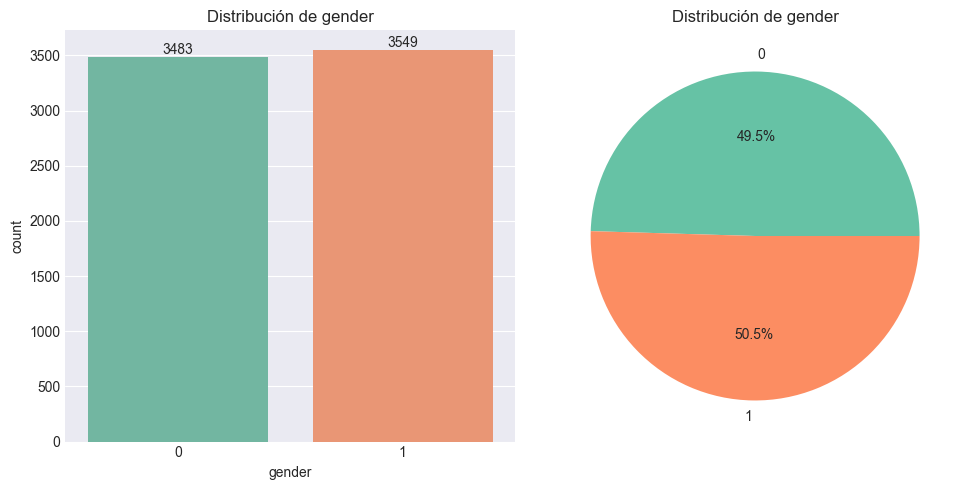


=== SENIORCITIZEN ===


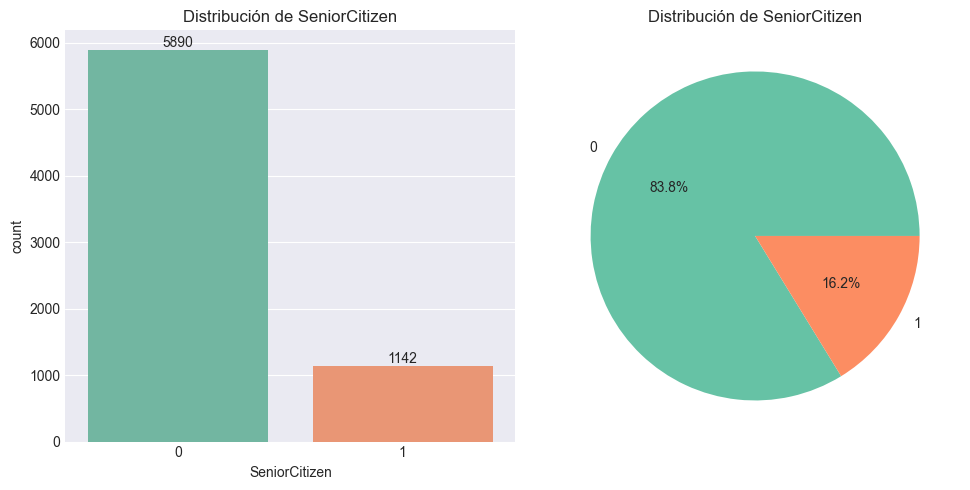


=== PARTNER ===


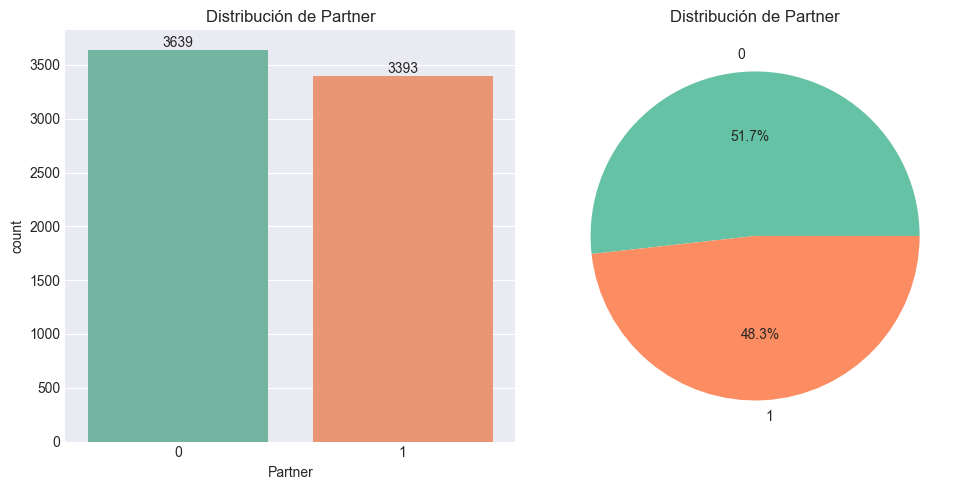


=== DEPENDENTS ===


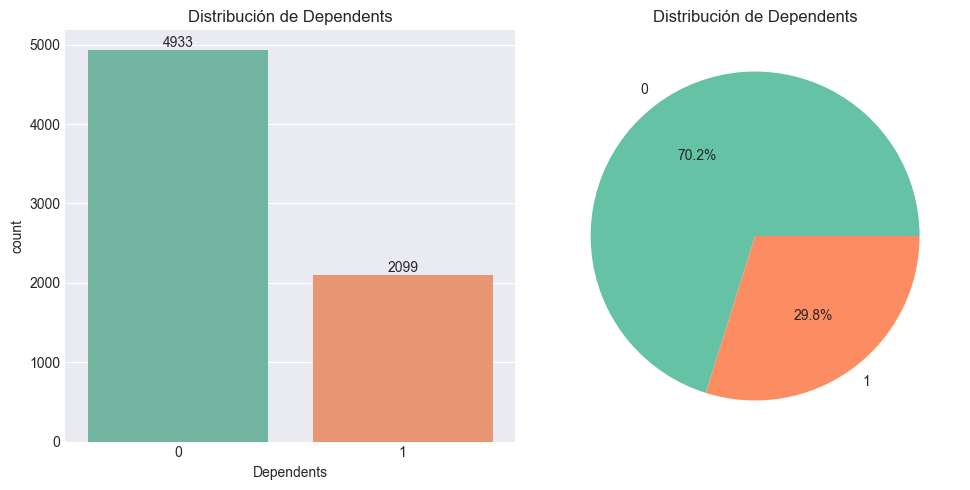


=== PHONESERVICE ===


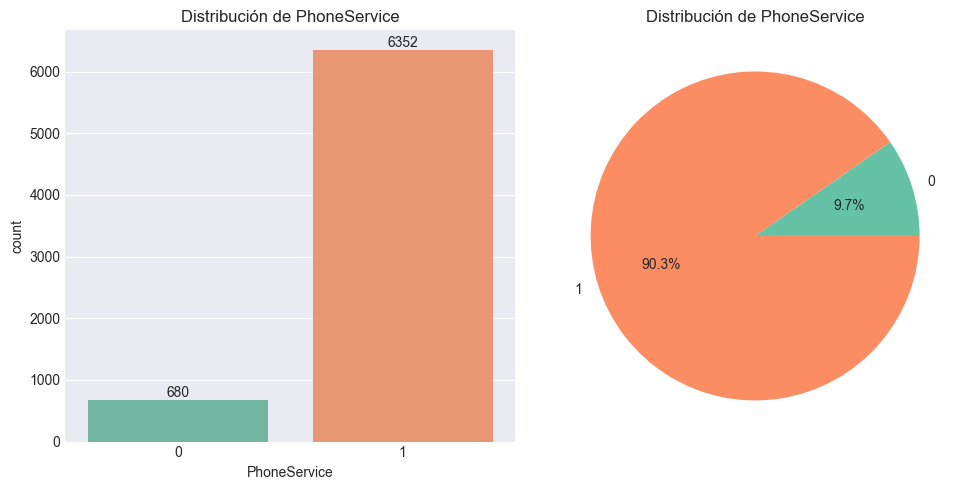


=== PAPERLESSBILLING ===


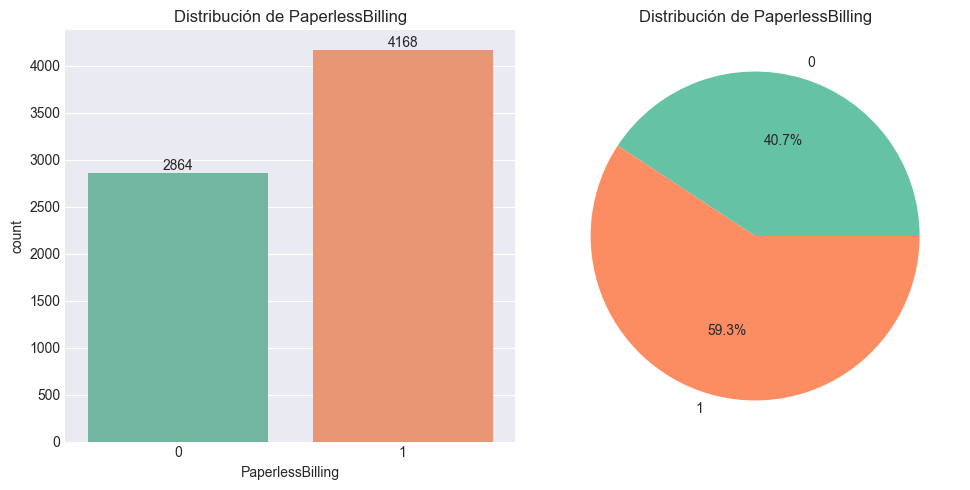


=== CHURN ===


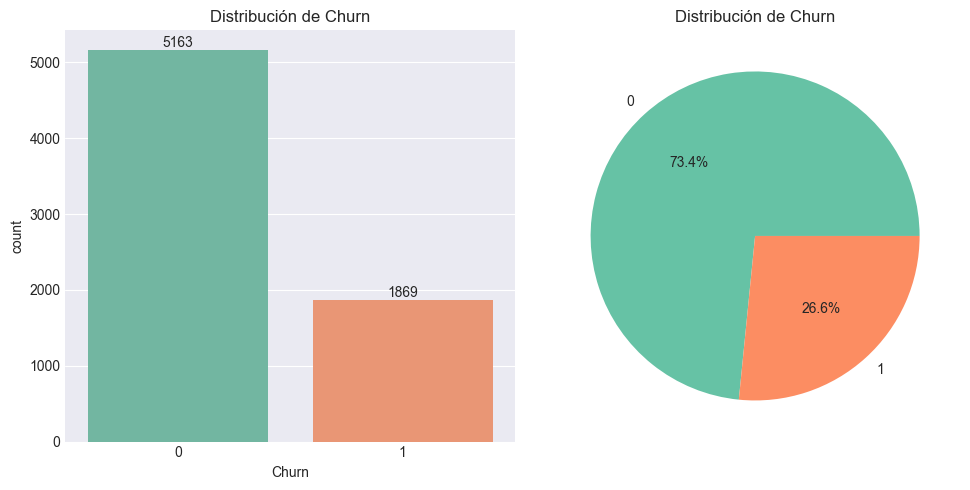

In [33]:
plt.style.use('seaborn-v0_8-darkgrid')
binarias = [col for col in df.columns if df[col].nunique() == 2]
for col in binarias:
    
    print(f"\n=== {col.upper()} ===")
    plt.figure(figsize=(10, 5))
    
    value_order = sorted(df[col].unique())
    colors = sns.color_palette('Set2')
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x=df[col], palette=colors, order=value_order)
    plt.title(f'Distribución de {col}')

    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.subplot(1, 2, 2)
    counts = df[col].value_counts().loc[value_order]  
    plt.pie(counts, 
            labels=counts.index, 
            autopct='%1.1f%%',
            colors=colors) 
    plt.title(f'Distribución de {col}')
    
    plt.tight_layout()
    plt.show()

**1. Distribución de Gender (Género)**

Porcentajes:

* `0`: 49.5% (Femenino)
* `1`: 50.5% (Masculino)

La base de clientes está prácticamente equilibrada entre ambos géneros (definidos como 0 y 1). No hay una dominancia clara de un género sobre el otro.

**2. Distribución de SeniorCitizen (Ciudadano Mayor)**

Porcentajes:

* `0`: 83.8% (No es adulto mayor)
* `1`: 16.2% (Es adulto mayor)
 
La gran mayoría de los clientes (casi 84%) no son ciudadanos mayores (0). Solo una minoría (16.2%) sí lo es (1). Esta es una variable desbalanceada.

**3. Distribución de Partner (Pareja)**

Porcentajes:

* `0`: 51.7% (No cuenta con pareja)
* `1`: 48.3% (Registra pareja)

La distribución es casi equitativa. Ligeramente más de la mitad de los clientes no tienen pareja (0).

**4. Distribución de Dependents (Dependientes)**

Porcentajes:

* `0`: 70.2% (No tiene dependientes)
* `1`: 29.8% (Tiene dependientes)

Una proporción significativa (70% de los clientes) no tiene dependientes (0). Aproximadamente 3 de cada 10 clientes sí declaran tenerlos (1).

**5. Distribución de PhoneService (Servicio Telefónico)**

Porcentajes:

* `1`: 90.3% (Cuenta con servicio telefónico)
* `0`: 9.7% (No registra servicio telefónico)

Casi todos los clientes (más del 90%) tienen el servicio de teléfono (1). Esta variable está muy desbalanceada. 

**6. Distribución de PaperlessBilling (Facturación sin Papel)**

Porcentajes:

* `0`: 40.7% (No cuenta con facturación sin papel)
* `1`: 59.3% (Registra facturación sin papel)

La mayoría de los clientes (casi 60%) ha optado por la facturación paperless (1). Es una tendencia moderna que se refleja en los datos.

**7. Distribución de Churn (Baja o Rotación)**

Porcentajes:

* `0`: 73.4% (No se dan de baja)
* `1`: 26.6% (Sí se dan de baja)

Esta es la variable objetivo crítica. Aproximadamente 1 de cada 4 clientes (26.6%) se da de baja (1). Esto representa una tasa de rotación (churn rate) alta, lo cual es una señal de alerta para el negocio. El conjunto de datos está desbalanceado para esta variable, lo cual es importante considerar si se va a construir un modelo predictivo.

### **Numéricas**

* `Tenure`

* `MonthlyCharges`

* `TotalCharges`

Realizamos un pequeño resumen estadístico de las variables numéricas, este resumen incluye la media, desviación estándar y cuartiles.

In [34]:
df["TotalCharges"] = df["TotalCharges"].astype(float)
numericas = ["tenure","MonthlyCharges","TotalCharges"]

df[numericas].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Se genera un histograma y un boxplot para visualizar la distribución de frecuencias e identificar outliers (puntos fuera de los bigotes) y la dispersión de los datos. Además se evalua:

- **Asimetría**

- **Curtosis**

- **Coeficiente de Variación**


=== TENURE ===
Skew: 0.24
Kurtosis:  -1.39
Coeficiente de Variación:  75.71 %


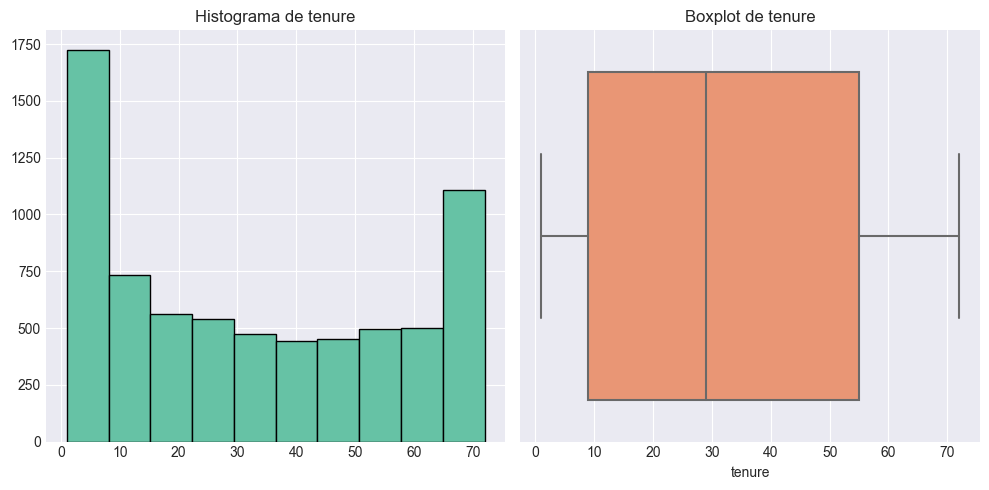


=== MONTHLYCHARGES ===
Skew: -0.22
Kurtosis:  -1.26
Coeficiente de Variación:  46.43 %


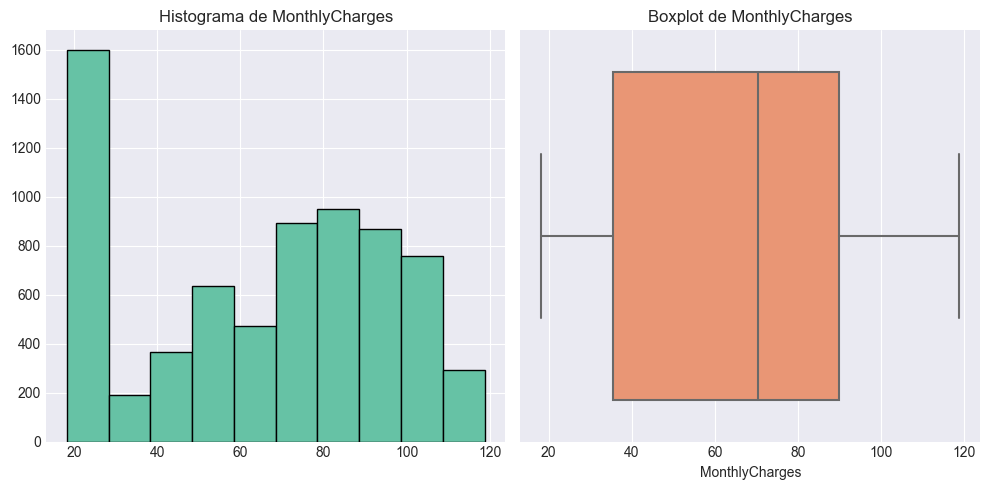


=== TOTALCHARGES ===
Skew: 0.96
Kurtosis:  -0.23
Coeficiente de Variación:  99.28 %


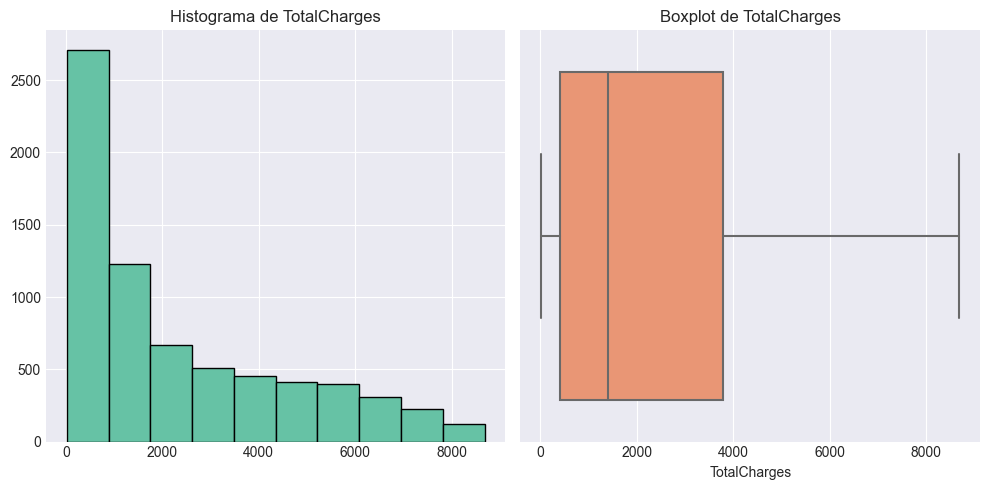

In [35]:
for col in numericas: 
    
    print(f"\n=== {col.upper()} ===")
    
    print('Skew:', round(df[col].skew(), 2))
    print('Kurtosis: ', round(df[col].kurtosis(), 2))
    coef_variacion = (df[col].std() / df[col].mean()) * 100
    print('Coeficiente de Variación: ', round(coef_variacion, 2), '%')
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=10, edgecolor="black", color=colors[0])
    plt.title(f'Histograma de {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color=colors[1])
    plt.title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()


**1. Análisis de Tenure (Antigüedad del Cliente)**

Estadísticas:

* `Media`: 32.4 meses
* `Mediana`: 29 meses
* `Desviación estándar`: 24.5 meses
* `Rango`: 1 a 72 meses
* `Asimetría`: 0.24
* `Curtosis`: -1.39

**Interpretación del Histograma y Boxplot:**

El histograma muestra picos en ambos extremos. Hay muchos clientes nuevos (antigüedad baja, alrededor de 0-10 meses) y muchos clientes muy leales (antigüedad alta, alrededor de 70 meses).

Por otro lado, el boxplot muestra que el 50% central de los clientes (la "caja") tiene una antigüedad entre 9 y 55 meses. Hay muchos valores atípicos en la parte baja (clientes muy nuevos), lo cual es esperable.


**2. Análisis de MonthlyCharges (Cargos Mensuales)**

Estadísticas:

* `Media`: $64.80
* `Mediana`: $70.35
* `Desviación estándar`: $30.09
* `Rango`: 18.25 a 118.75 dólares
* `Asimetría`: -0.22
* `Curtosis`: -1.26

**Interpretación del Histograma y Boxplot:**

La mediana está más cerca del percentil 75, lo que indica que la distribución está ligeramente sesgada a la izquierda (más clientes con cargos altos). No hay valores atípicos extremos, lo que sugiere que los planes de precios están bien definidos.


**3. Análisis de TotalCharges (Cargos Totales)**

Estadísticas:

* `Media`: $2283.30
* `Mediana`: $1397.48
* `Desviación estándar`: $2266.77 
* `Rango`: 18.80 a 8684.80 dólares
* `Asimetría`: 0.96
* `Curtosis`: -0.23

**Interpretación del Histograma y Boxplot:**

El histograma muestra una distribución altamente sesgada a la derecha, lo que sugiere que la gran mayoría de los clientes ha pagado cantidades relativamente bajas en total (pico inicial muy alto), mientras que una larga cola se extiende hacia valores altos.

Relativo al boxplot, la mediana (1397) es mucho menor que la media (2283), lo que confirma el sesgo. El 50% central de los clientes ha pagado entre 401 dólares y 3794 dólares. Hay muchos valores atípicos en el extremo alto, que son los clientes con mucha antigüedad y/o cargos mensuales altos.


#### **Valores atípicos**

Dado que el proyecto aborda un problema de clasificación binaria, los modelos basados en árboles de decisión como Random Forest, XGBoost, LightGBM y CatBoost son naturalmente robustos ante valores atípicos.

Esto se debe a que los modelos no basan sus decisiones en los valores más altos o más bajos, sino en la proporción de clases dentro de los datos. Además, al combinar muchos árboles, el efecto de casos poco comunes o extremos se reduce. Por eso, no es necesario eliminar todos los valores atípicos antes de entrenar el modelo.

### **Categóricas**

* `MultipleLines`

* `InternetService`

* `OnlineSecurity`

* `OnlineBackup`

* `DeviceProtection`

* `TechSupport`

* `StreamingTV`

* `StreamingMovies`

* `Contract`

* `PaymentMethod`

Observamos un pequeño resumen estadístico de las variables categóricas, que incluye el número de registros y valores únicos, además de la categoría más frecuente y el número de observaciones de esta clase.

In [36]:
categoricas = [col for col in df.columns if col not in (numericas+binarias) and col != "customerID"]
df[categoricas].describe()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,3,3,3,3,3,3,3,3,3,4
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3385,3096,3497,3087,3094,3472,2809,2781,3875,2365


Se generan gráficos de barras para visualizar la distribución de cada variable categórica. 

**Cada gráfico muestra**:

- El número absoluto de observaciones (conteo).
- El porcentaje relativo respecto al total.
- Las categorías ordenadas de mayor a menor.


=== MULTIPLELINES ===


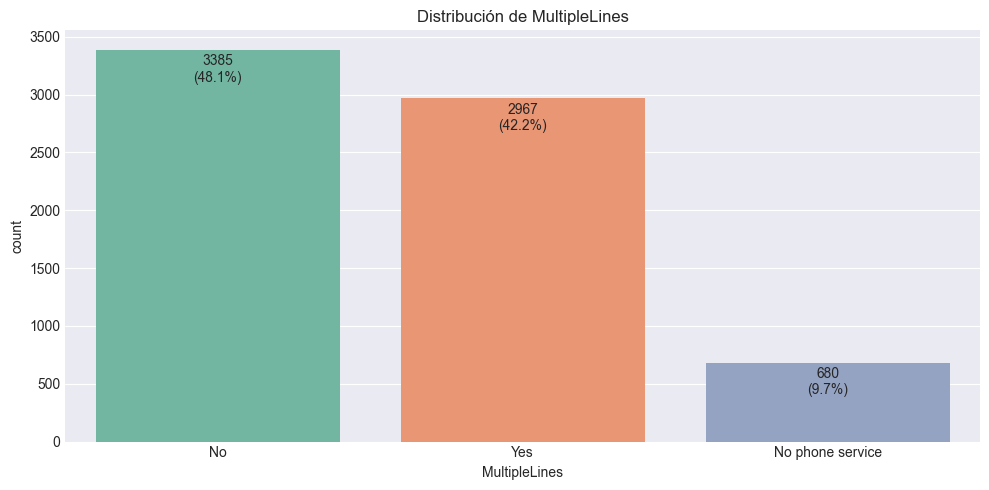


=== INTERNETSERVICE ===


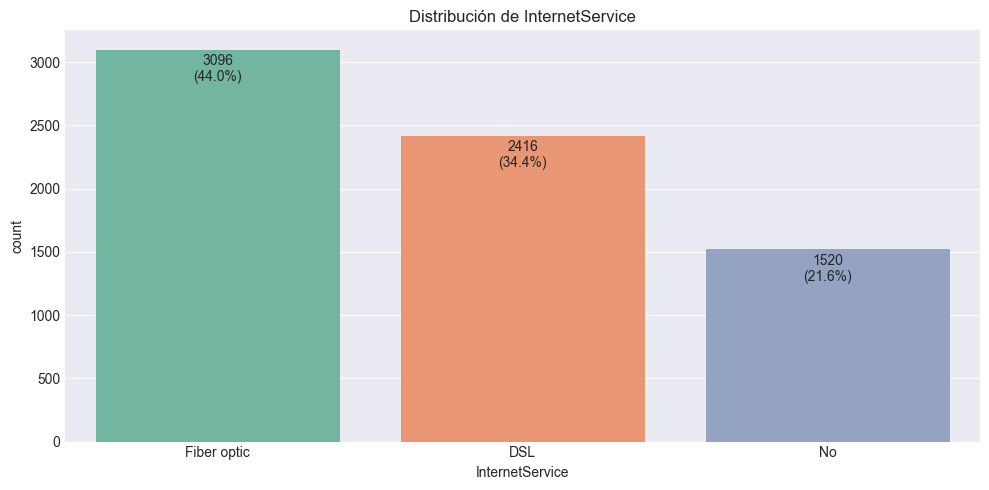


=== ONLINESECURITY ===


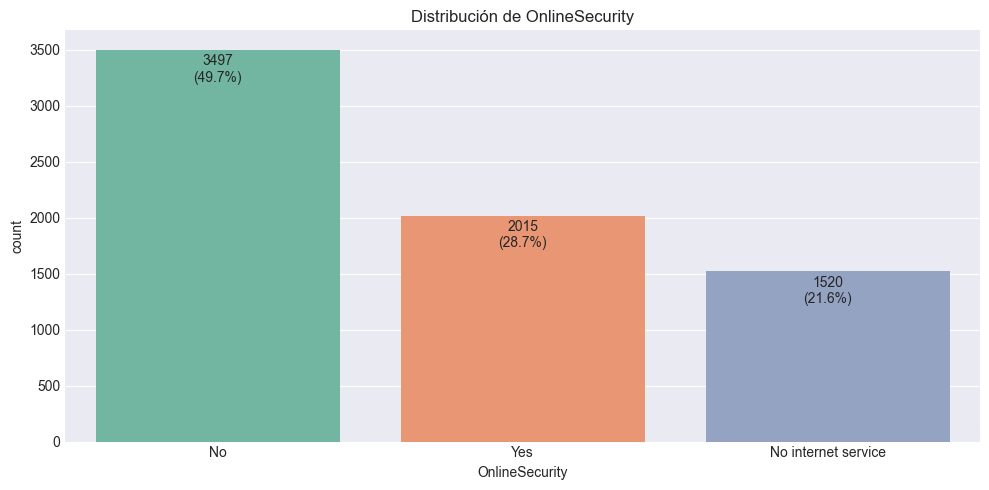


=== ONLINEBACKUP ===


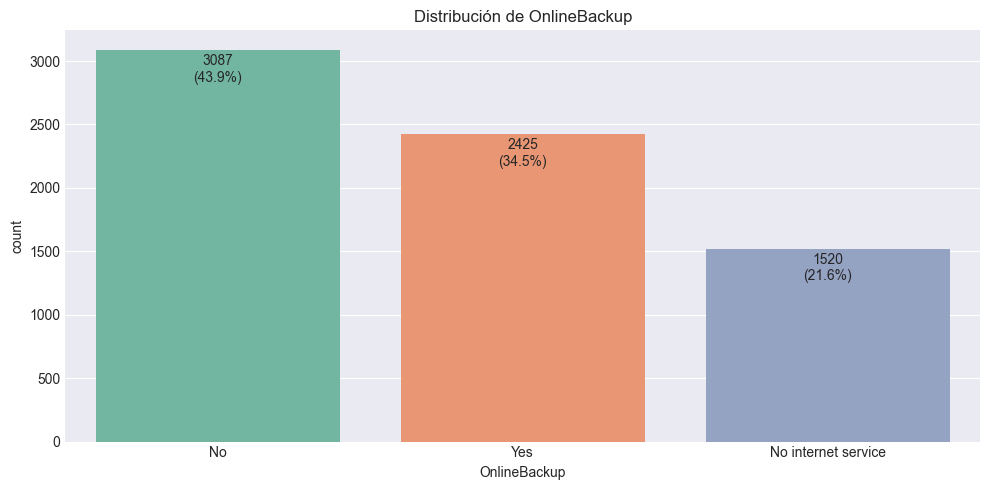


=== DEVICEPROTECTION ===


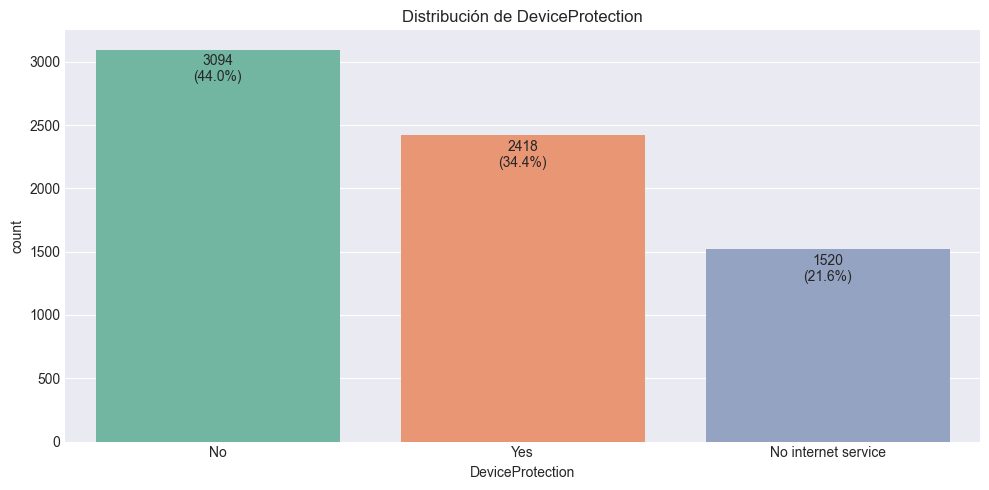


=== TECHSUPPORT ===


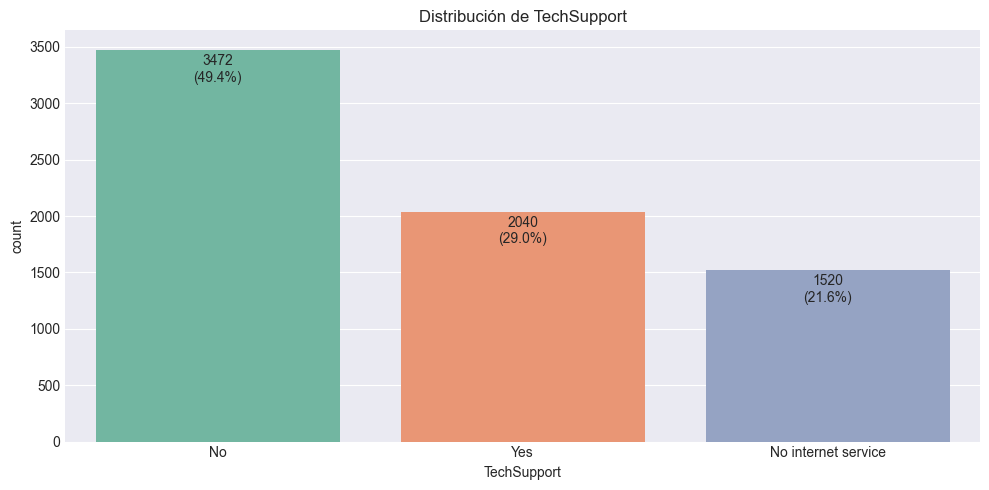


=== STREAMINGTV ===


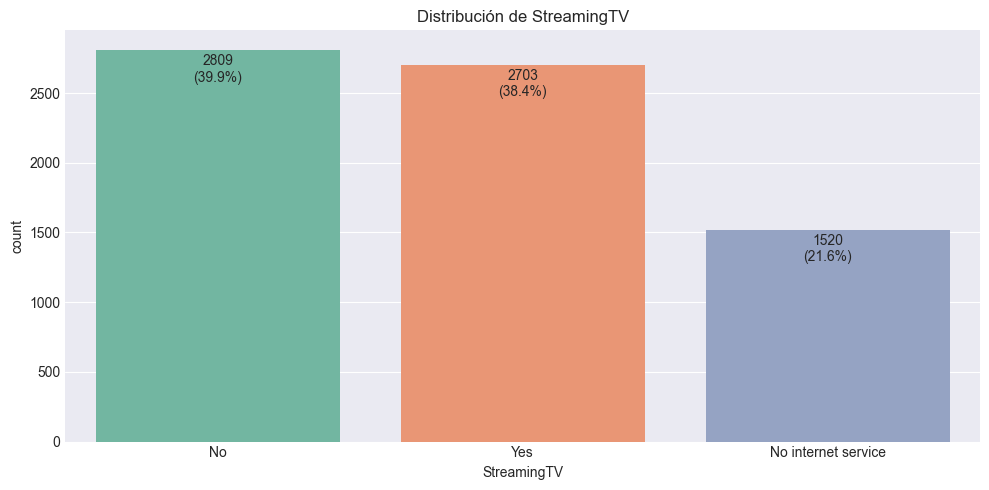


=== STREAMINGMOVIES ===


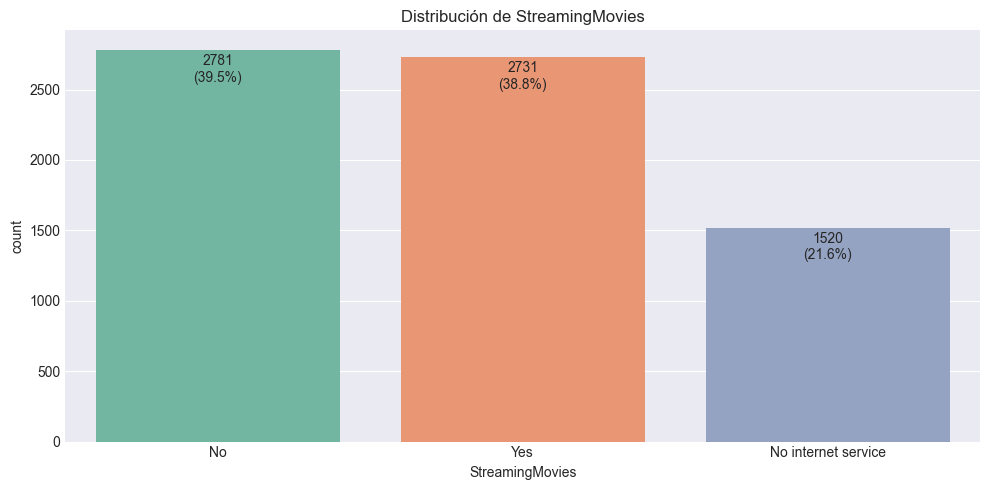


=== CONTRACT ===


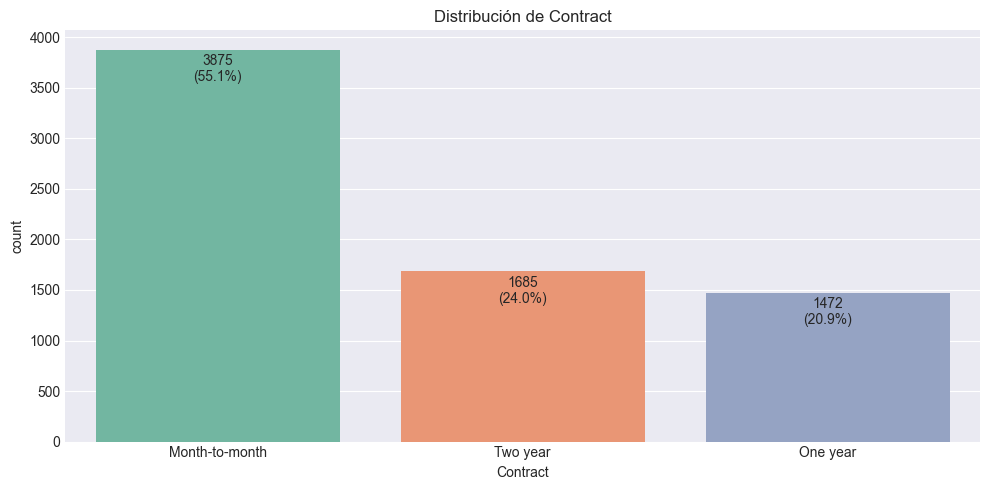


=== PAYMENTMETHOD ===


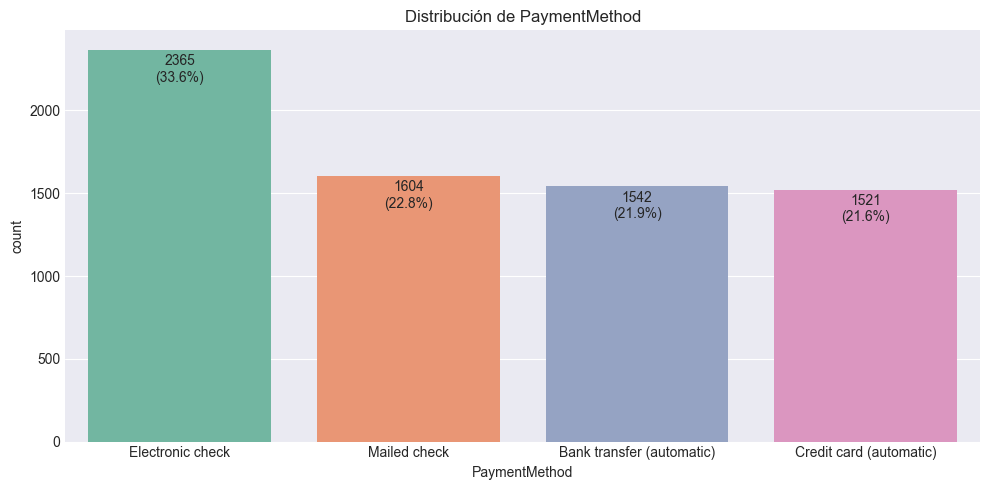

In [37]:
for col in categoricas:
    
    print(f"\n=== {col.upper()} ===")
    
    plt.figure(figsize=(10, 5))
    
    value_order = df[col].value_counts().index
    
    ax = sns.countplot(x=df[col], order=value_order, palette='Set2')
    
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * p.get_height() / len(df[col])
        ax.annotate(f'{count}\n({percent:.1f}%)',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, -14),
                    textcoords='offset points')
        
    plt.title(f'Distribución de {col}')
    
    plt.tight_layout()
    plt.show()

**Hallazgos variables categóricas**

1. `MultipleLines` (Múltiples Líneas)

    - No: 48.1% 
    - Sí: 42.2% 
    - Sin servicio telefónico: 9.7% 

    La mayoría de los clientes con teléfono tienen una sola línea. Una porción significativa (42%) paga por el servicio adicional de múltiples líneas.

2. `InternetService` (Servicio de internet)

    - Fibra Óptica: 44.0% 
    - DSL: 34.4% 
    - Sin Internet: 21.6% 

    La Fibra Óptica es el servicio de internet más contratado con un 44% de clientes.

3. `OnlineSecurity` (Seguridad en Línea)

    - No: 49.7% 
    - Sí: 28.7% 
    - Sin Internet: 21.6%

    La mayoría de los clientes con internet NO contrata el servicio de seguridad en línea. Es el servicio adicional con la tasa de adopción más baja.

4. `OnlineBackup` (Copia de Seguridad en Línea)

    - No: 43.9% 
    - Sí: 34.5% 
    - Sin servicio de internet: 21.6%

    Tiene una adopción moderada, mejor que la seguridad en línea.

5. `DeviceProtection` (Protección de Dispositivos)

    - No: 44.0% 
    - Sí: 34.4% 
    - Sin servicio de internet: 21.6%

    La proporción del servicio de protección de dispositivos es casi idéntica a la de OnlineBackup.

6. `TechSupport` (Soporte Técnico)

    - No: 49.4% 
    - Sí: 29.0% 
    - Sin Internet: 21.6%

    Junto con la Seguridad en Línea, es uno de los servicios adicionales menos populares. Los clientes parecen reacios a pagar por soporte técnico.

7. `StreamingTV` (Streaming)

    - No: 39.9%
    - Sí: 38.4%
    - Sin servicio de internet: 21.6%

8. `StreamingMovies` (Streaming)

    - No: 39.5%
    - Sí: 38.8%
    - Sin servicio de internet: 21.6%

    Entre los clientes con internet, la adopción de servicios de streaming está casi perfectamente dividida a la mitad. Esto sugiere que son servicios muy populares para las ofertas de la compañía. 

9. `Contract` (Tipo de Contrato)

    - Mensual (Month-to-month): 55.1% 
    - Un año (One year): 24.0% 
    - Dos años (Two year): 20.9% 

    Más de la mitad de los clientes están en un contrato mensual, lo que les da la máxima flexibilidad para darse de baja sin penalización. Esto es un factor de riesgo enorme para la tasa de churn.

10. `PaymentMethod` (Método de Pago)

    - Cheque electrónico (Electronic check): 33.6%
    - Cheque postal (Mailed check): 22.8%
    - Transferencia bancaria automática: 21.9%
    - Tarjeta de crédito automática: 21.6%

    Una cantidad significativa de clientes utiliza métodos de pago manuales, lo que puede asociarse a una mayor probabilidad de morosidad y baja involuntaria. Los pagos automáticos suelen generar mayor retención.

## **Análisis Bivariado**

El análisis bivariado constituye la segunda etapa fundamental del proceso de exploración de datos, centrándose específicamente en la evaluación sistemática de las relaciones existentes entre pares de variables.

### **Variables Binarias vs Churn**

Se generan graficos de barras para analizar la relación entre un conjunto de variables binarias y la baja de clientes del servicio, esto con el fin de visualizar qué variables binarias están asociadas a mayores proporciones 'churn' en el conjunto de datos.

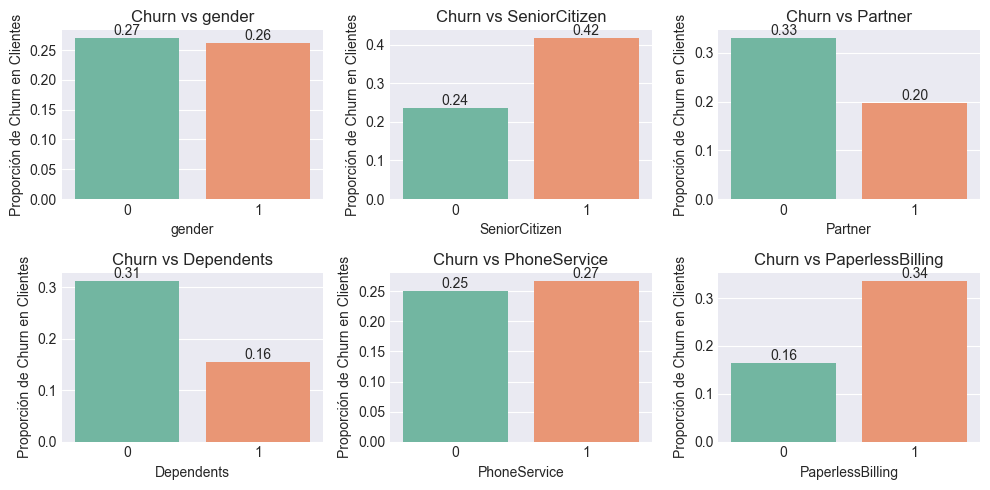

In [38]:
plt.figure(figsize=(10, 5)) 

for i, col in enumerate(binarias, 1):  
    if col != "Churn":
        plt.subplot(2, 3, i) 
        ax = sns.barplot(
        x=col, 
        y='Churn', 
        data=df, 
        palette='Set2',
        errorbar=None
        )
        plt.title(f'Churn vs {col}')
        plt.ylabel('Proporción de Churn en Clientes')
        
        for container in ax.containers:
            ax.bar_label(container, fmt="%.2f")  
            
plt.tight_layout()  
plt.show()

**Entre los principales hallazgos podemos comentar:**

* **Churn vs Gender**

Hombres (1) y mujeres (0) presentan tasas de abandono prácticamente iguales: 0.26 vs 0.27. El género no parece influir significativamente en la probabilidad de abandono.

* **Churn vs SeniorCitizen**

Los clientes mayores (1) tienen una tasa de churn del 42%, frente al 24% de los no mayores. Ser adulto mayor está fuertemente asociado con una mayor probabilidad de abandono, esto puede deberse a menor afinidad con servicios tecnológicos o sensibilidad a precios.

* **Churn vs Dependents**

Los clientes sin dependientes (0) presentan una tasa de churn del 31%, mientras que los que sí tienen dependientes (1) solo 16%. Tener dependientes se asocia con mayor retención, es posible que clientes con familia valoren más la continuidad del servicio.

* **Churn vs PaperlessBilling**

Los clientes con facturación electrónica (1) presentan una tasa de churn del 34%, mientras que los de factura física (0) solo 16%. La facturación electrónica está asociada con mayor abandono. Es posible que la factura física implique clientes más tradicionales y leales.

### **Variables Categóricas vs Churn**

Se generan graficos de barras para analizar la relación entre variables categóricas y Churn


=== MULTIPLELINES ===


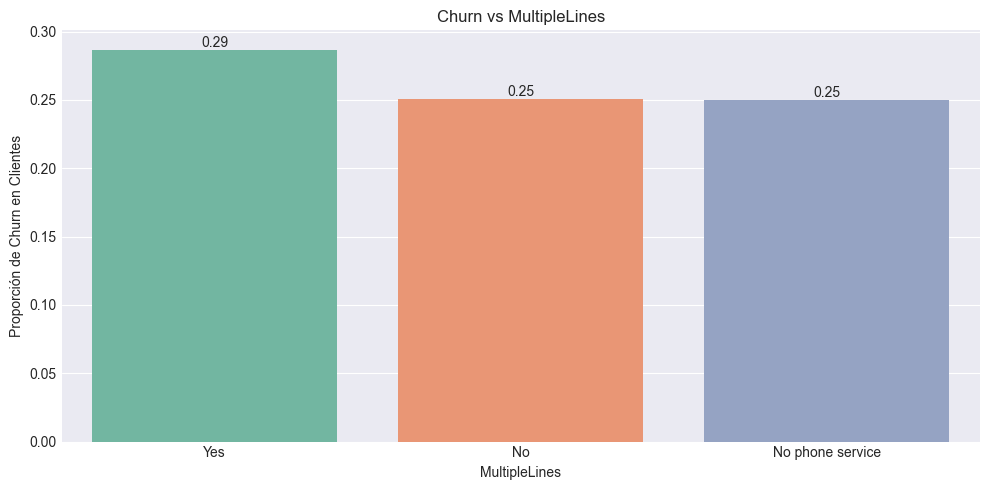


=== INTERNETSERVICE ===


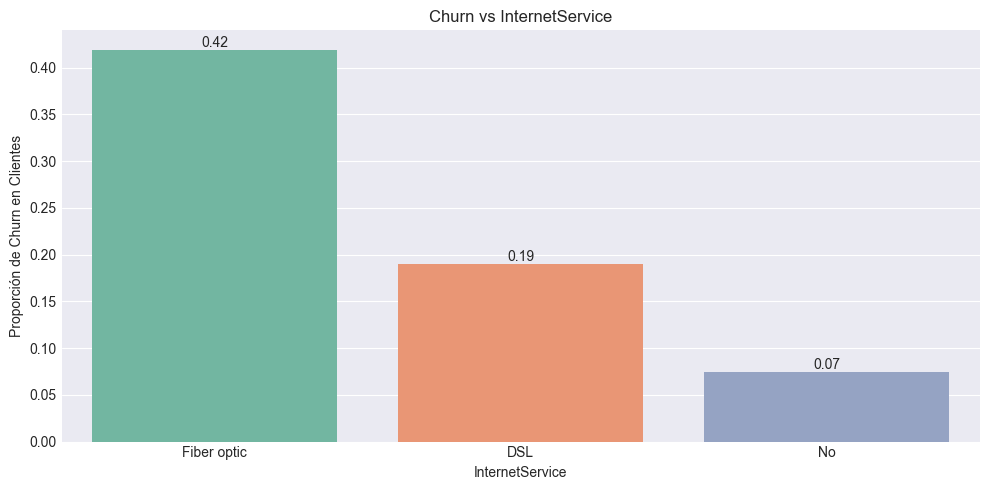


=== ONLINESECURITY ===


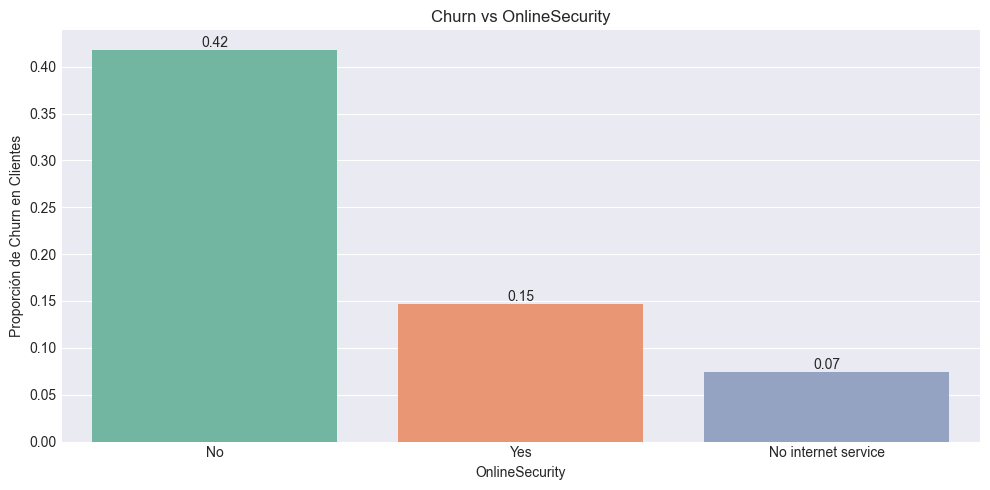


=== ONLINEBACKUP ===


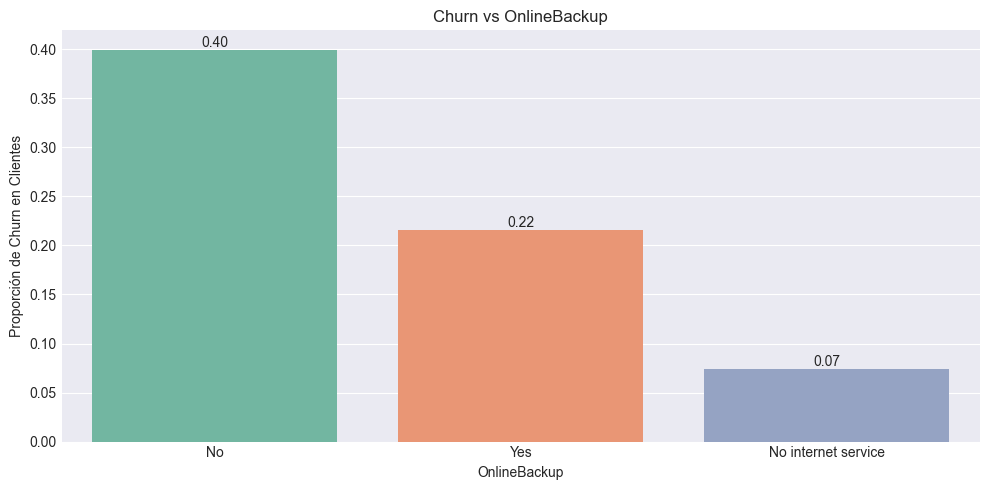


=== DEVICEPROTECTION ===


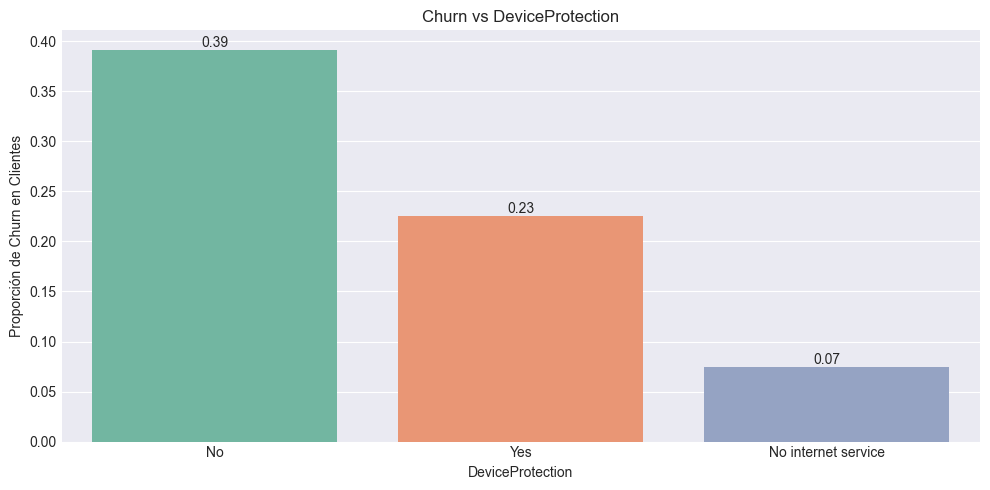


=== TECHSUPPORT ===


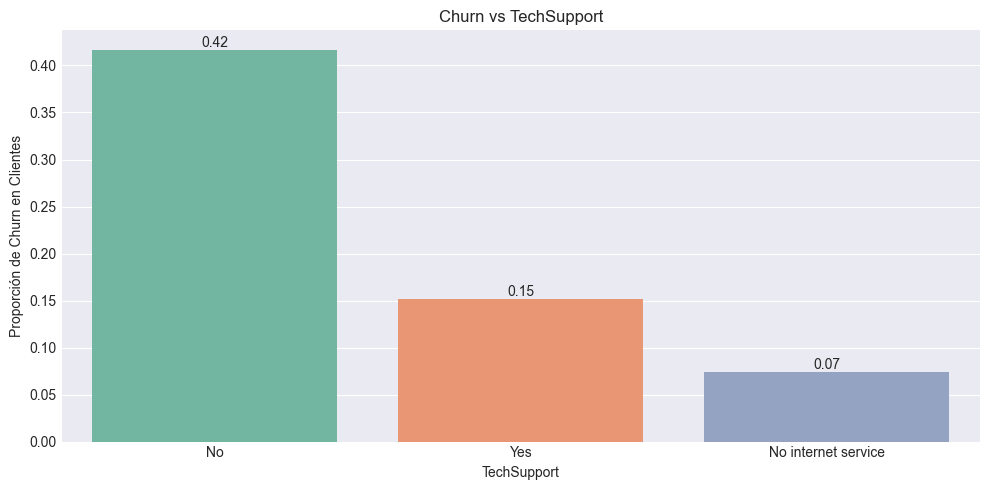


=== STREAMINGTV ===


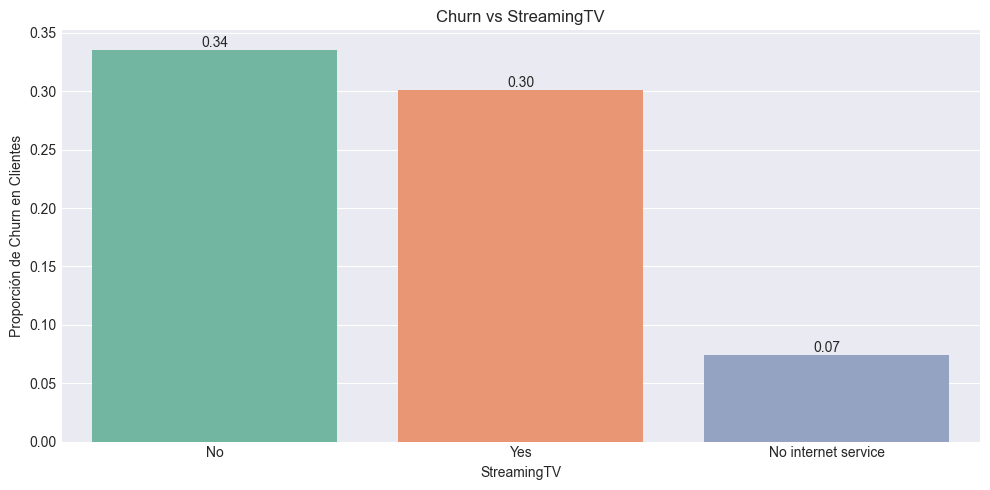


=== STREAMINGMOVIES ===


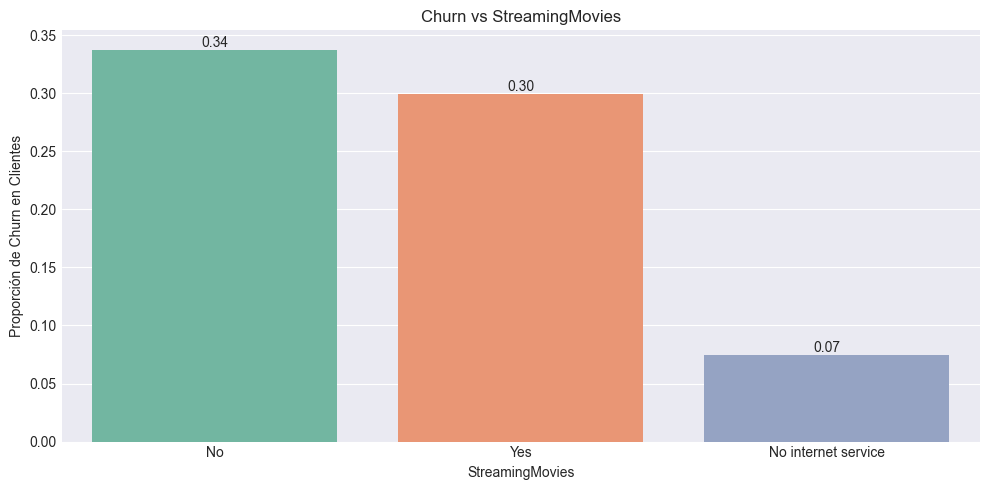


=== CONTRACT ===


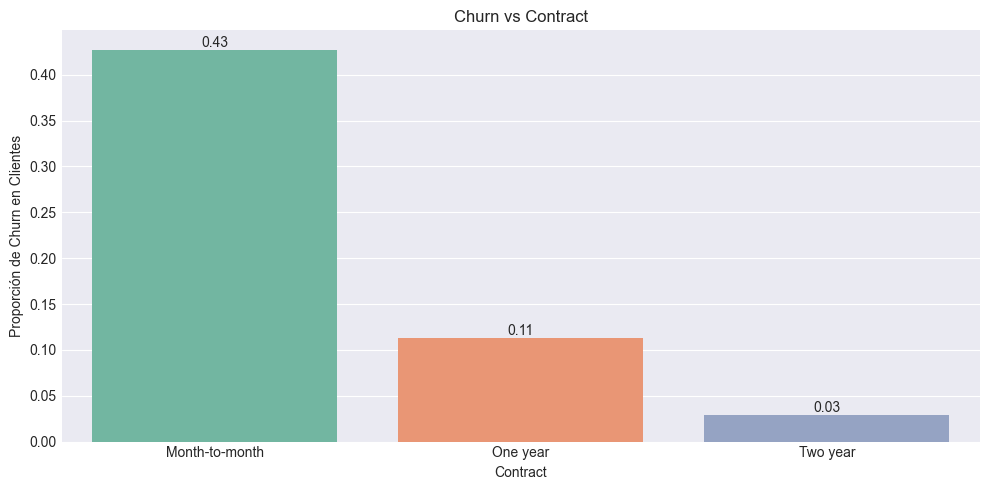


=== PAYMENTMETHOD ===


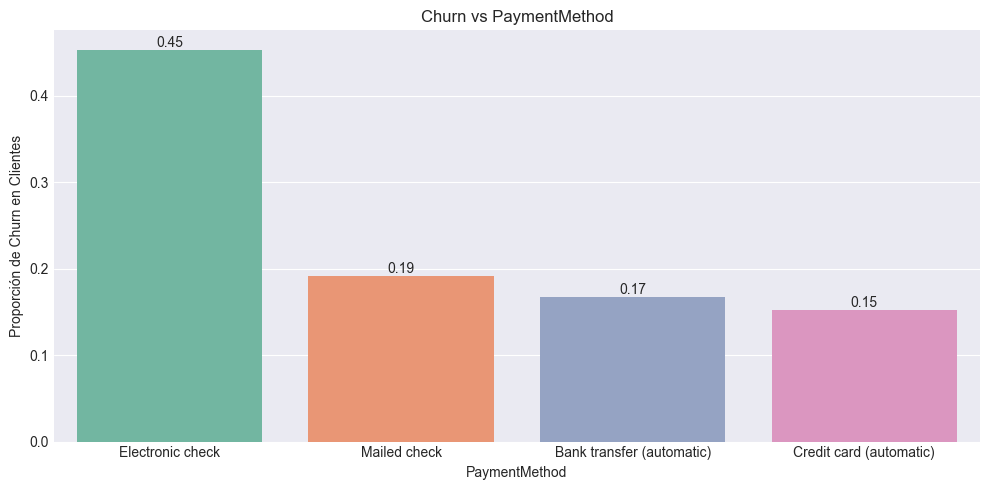

In [39]:
for col in categoricas:
    
    print(f"\n=== {col.upper()} ===")
    plt.figure(figsize=(10, 5))
    
    order = (
        df.groupby(col)['Churn']
        .mean()
        .sort_values(ascending=False)
        .index
    )
    
    ax = sns.barplot(
        x=col, 
        y='Churn', 
        data=df, 
        palette='Set2',
        errorbar=None,
        order=order
    )

    plt.title(f'Churn vs {col}')
    plt.ylabel('Proporción de Churn en Clientes')
    
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f")
          
    plt.tight_layout()
    plt.show()

Entre los principales hallazgos con respecto a la relación de variables categóricas con nuestra variable objetivo podemos observar.

* **Churn vs Contract (Tasa de Churn)**

    - `Month-to-month` (Mensual): 43% 
    - `One year` (Un año): 11%
    - `Two year` (Dos años): 3%

    Este es el hallazgo más importante de todo el análisis. Los clientes con contrato mensual tienen una probabilidad mucho mayor de darse de baja que aquellos con contrato bianual. La falta de compromiso a largo plazo es el mayor predictor de churn.

* **Churn vs InternetService (Tasa de Churn)**

    - `Fibra Óptica`: 42% 
    - `DSL`: 19%
    - `Sin Internet`: 7%

    Es un hallazgo contraintuitivo y crítico. Aunque la Fibra Óptica es el servicio más popular, también tiene la tasa de churn más alta. Esto podría deberse a:

    * Precio más caro,
    * Mayor disponibilidad de proveedores alternativos de fibra.
    * Altas expectativas de clientes y por tanto son menos tolerantes a fallos.

* **Churn vs PaymentMethod (Tasa de Churn)**

    - `Electronic check` (Cheque electrónico): 45% 
    - `Mailed check` (Cheque postal): 19%
    - `Bank transfer` (automatic): 17%
    - `Credit card` (automatic): 15%

    Los clientes que pagan con cheque electrónico son el grupo de mayor riesgo, con una tasa de churn enorme. Los pagos automáticos (con tarjeta o transferencia) muestran una retención significativamente mayor. El pago manual y no automático es un fuerte indicador de propensión a la baja.

### **Variables Numéricas vs Churn**

Con el objetivo de identificar y caracterizar la relación entre las variables numéricas predictoras y la variable objetivo (`Churn`), se implementa una serie de diagramas de caja (boxplots). Esta técnica de visualización permite comparar de manera efectiva las distribuciones de cada variable numérica.


=== TENURE ===


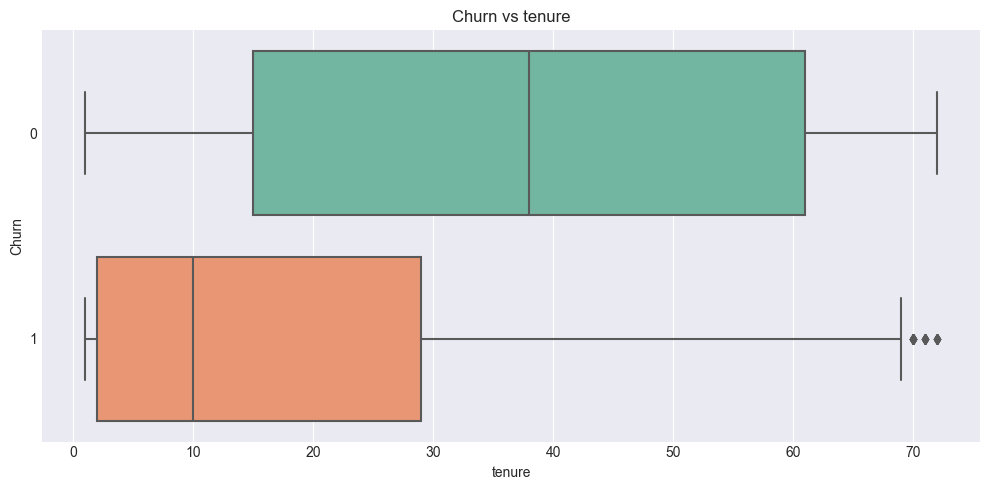


=== MONTHLYCHARGES ===


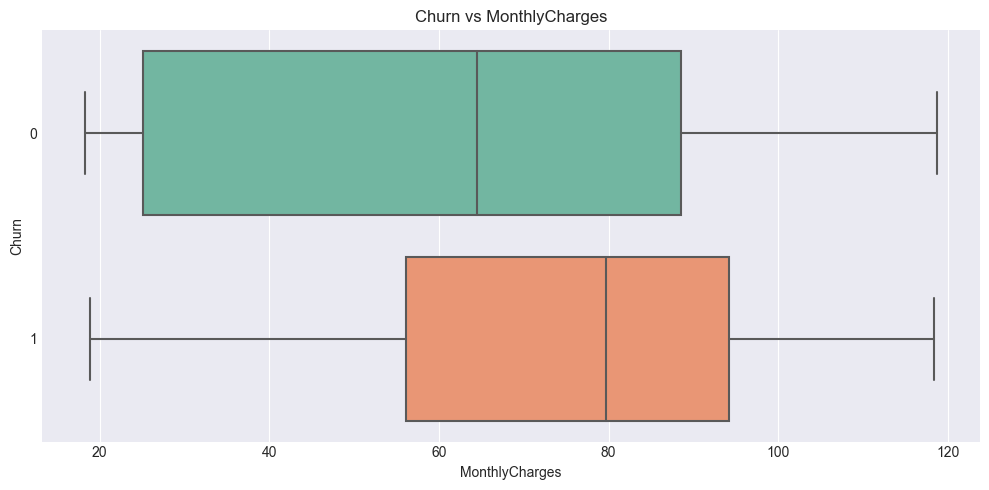


=== TOTALCHARGES ===


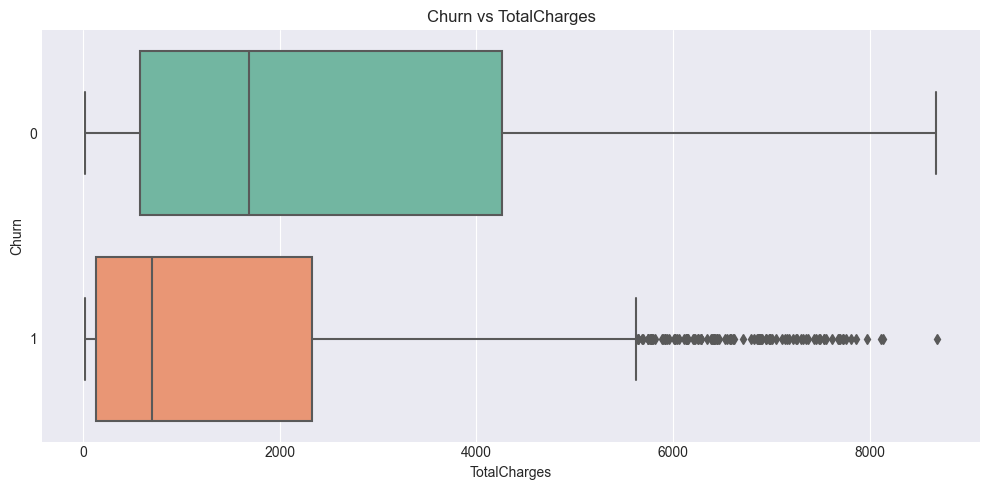

In [40]:
for col in numericas:
    print(f"\n=== {col.upper()} ===")
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        x=col,          
        y='Churn',        
        data=df, 
        palette='Set2', 
        orient='h'      
    )
    plt.title(f'Churn vs {col}') 
    plt.tight_layout()
    plt.show()

*  **Churn vs Tenure (Antigüedad)**

(`Churn=1`): Tienen una antigüedad muy baja. La mediana (línea dentro de la caja) está por debajo de los 10 meses. El 50% central de los que se van (la caja) tiene entre 1 y ~30 meses de antigüedad. 

Existe una relación inversa y extremadamente fuerte entre la antigüedad y el churn. Cuanto menos tiempo lleva un cliente, mayor es su probabilidad de darse de baja. El riesgo es máximo durante el primer año.

*  **Churn vs MonthlyCharges (Cargos Mensuales)**

(`Churn=1`): Tienen cargos mensuales más altos. La mediana para este grupo está alrededor de 80-85. Existe una relación directa entre el precio mensual y el churn. Los clientes que pagan más al mes son más propensos a irse. 

* **Churn vs TotalCharges (Cargos Totales)**

(`Churn=1`): Han pagado cantidades totales muy bajas, está relacionado con el tenure, menor tiempo de antigüedad, implica menores cargos totales.

## **Análisis Multivariado**

Para identificar relaciones lineales entre las variables del Dataset, se generó una matriz de correlación Este gráfico muestra el coeficiente de correlación entre cada par de variables.

### **Matriz de correlación**

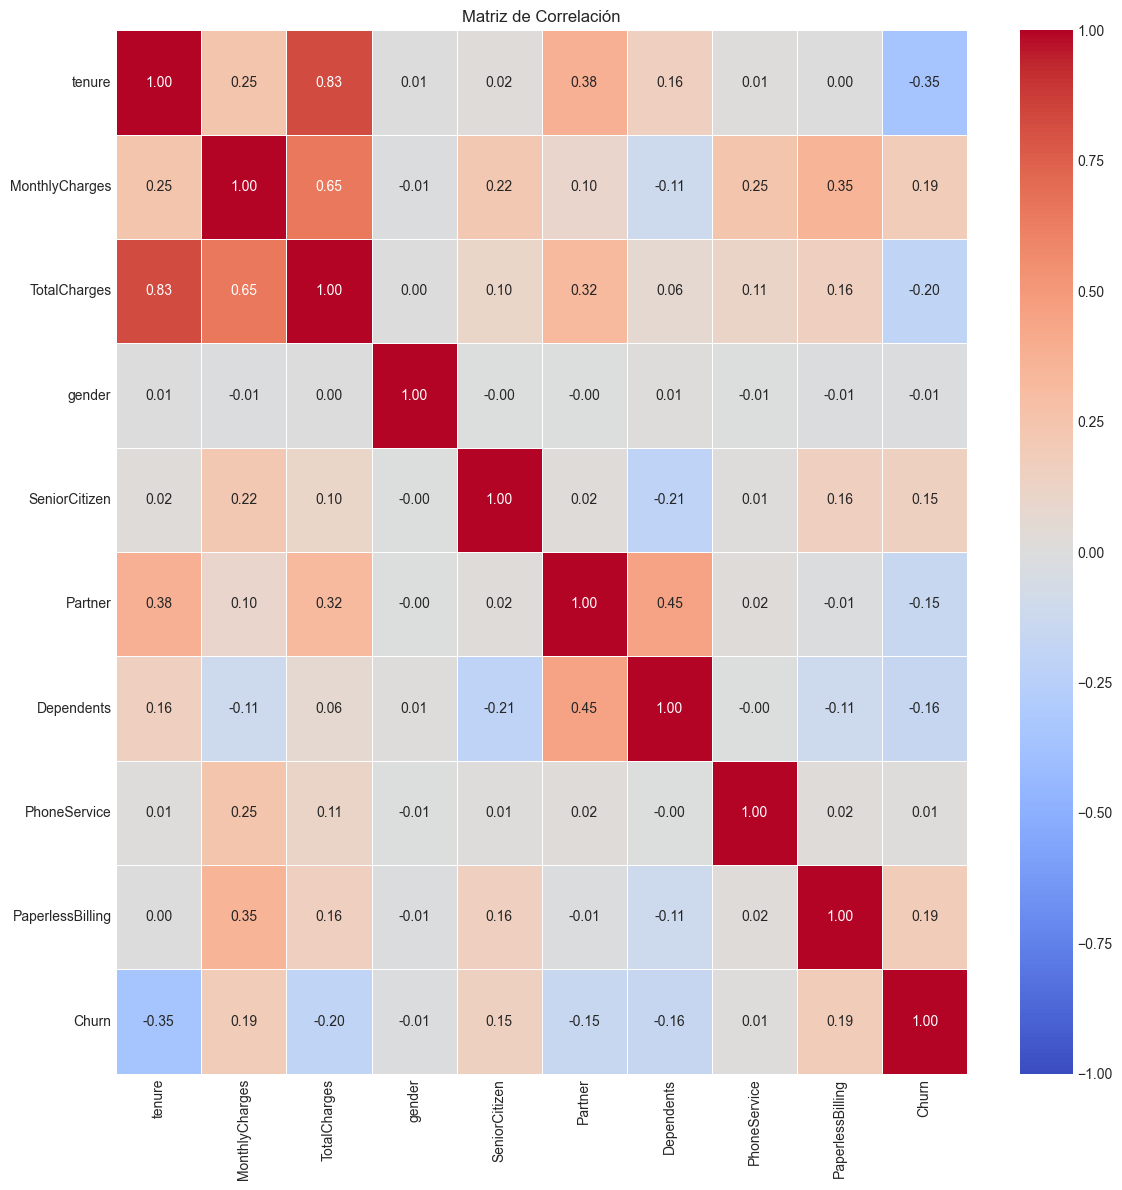

In [41]:
df_heatmap = pd.concat([df[numericas + binarias]], axis=1)

plt.figure(figsize=(12, 12))
sns.heatmap(
    df_heatmap.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

**Relación con Churn**

* `tenure` (-0.35)	Correlación moderada negativa:

    Cuanto más tiempo lleva el cliente con la compañía, menor probabilidad de abandonar. Es la relación más fuerte: los clientes nuevos son mucho más propensos al churn.

* `TotalCharges` (-0.20)	Correlación débil negativa:	
    
    Los clientes que han acumulado cargos más altos (es decir, que han pagado más durante más tiempo) también tienden a ser más fieles.

* `MonthlyCharges` (0.19) Correlación débil positiva:	
    
    Los clientes con cargos mensuales altos tienen una mayor tendencia al abandono, posiblemente por percibir un costo excesivo del servicio.

**Otras relaciones**

* `Partner - Dependents` (0.45) Moderada positiva:
    
    Los clientes con pareja tienen mayor probabilidad de tener dependientes. Refleja coherencia entre variables familiares.

* `PaperlessBilling - MonthlyCharges` (0.35) Moderada positiva:
    
    Los clientes con facturación electrónica suelen tener planes más costosos.

### **Multicolinealidad**

Los algoritmos basados en árboles de decisión realizan divisiones de forma jerárquica y secuencial, dado que poseen la capacidad inherente de manejar variables correlacionadas sin que esto genere una degradación significativa en su rendimiento predictivo. Este comportamiento se explica por el mecanismo de selección de variables durante la construcción de los árboles, donde en cada nodo se evalúan múltiples características para determinar la división óptima.